In [13]:
import sys
sys.path.append('../../')
from ef.config.visualizer import Visualizer3d
from ef.config.efconf import EfConf
from ef.config.components import *

According to theory, the ion momentum distribution in the ion gas obeys the Maxwell distribution. The Maxwell distribution for discrete values has the following form:
\begin{equation}
\frac{N_i}{N} =  \left(\frac{1}{2mkT}\right)^{3/2} p_i^2 \ e^{-\frac{p_i^2}{2mkT}},
\end{equation}
where $N_i$ is the expected number of particles in the single-particle microstate i, which is characterized by the momentum interval $p_i$, 
$N$ is the total number of particles in the isolated system,
$m$ is the ion mass,
$T$ is the equilibrium temperature of the system, $k$ is the Boltzmann constant.

To perform the simulation of the ion gas evolution, the necessary step is to create an isolated system, where our gas will be contained and come to an equilibrium. As a simple case, rigid boxlike boundaries had been implemented, that cause ions to be reflected from them.

Suppose we have an ensemble of charged particles, which have the energy $E = 1\ eV$ and are put into the isolated system.  It's mass $m$ and charge $q$ are $q = 4.8\cdot10^{-8}\ [cgs]$, $m = 9.1\cdot10^{-22}\ [g]$. Since it's energy is nonrelativistic, it's possible to calculate it's speed simply as $v = \sqrt{ 2 E / m } = 1.385\cdot10^{5} ~ [cm/s]$. 
Firstly, we have to initialize the linear size of our isolated system (assuming that it will be a cube). We put our box to be the $0.04\ [cm]$ linear scale size, which contains $N = 100$ particles. Knowing the number of particles and the volume of the box, you can calculate the density of particles: $V = 0.00^3 \ \ [cm^3] = 6.4\cdot 10^{-5}\ \ [cm^3],\ n = N/V = 1.25\cdot 10^{6}\ \ [cm^{-3}]$, where V is the volume of the box, n is the density of ions inside this box.

In [10]:
from math import *

m = 1.67e-22
q = 4.8e-8
print( "q = {:.3e} [cgs]".format( q ) )
print( "m = {:.3e} [g]".format( m ) )

ev_to_cgs = 1.60218e-12
E = 1 * ev_to_cgs
v = sqrt( 2 * E / m )
k_B = 1.38e-16
T = (2/3)* (E /k_B)
print( "E = {:.3e} [eV] = {:.3e} [erg]".format( E / ev_to_cgs, E ) )
print( "v = {:.3e} [cm/s]; p = {:.3e} [g * cm/s]".format( v, v * m ) )
print( "T = {:.3e} [K]".format( T ) )

N = 100
lin_size_box = 0.04
V = lin_size_box ** 3
n = N / V
print( "N = {:.3e}".format( N ) )
print( "box_size = {:.3e} x {:.3e} x {:.3e} [cm^3]".format( lin_size_box, lin_size_box, lin_size_box ) )
print( "n = {:.3e}".format( n ) )

q = 4.800e-08 [cgs]
m = 1.670e-22 [g]
E = 1.000e+00 [eV] = 1.602e-12 [erg]
v = 1.385e+05 [cm/s]; p = 2.313e-17 [g * cm/s]
T = 7.740e+03 [K]
N = 1.000e+02
box_size = 4.000e-02 x 4.000e-02 x 4.000e-02 [cm^3]
n = 1.562e+06


Suppose that particle distribution inside the box is uniform. Then we should choose the time step size $dt$ equals to the time for which a particle passes one tenth part the mean free path. That choice of the path allows us to take into account the most of collisions underwent by each particle. 

In [14]:
n_linear = n ** (1/3)
free_path = lin_size_box / n_linear 
dt = free_path / v / 10

print( "free_path = {:.3e} [cm]".format( free_path ) )
print( "dt = {:.3e} [s]".format( dt ) )

free_path = 3.447e-04 [cm]
dt = 2.489e-10 [s]


After we have completed estimation of the parameters, we will start creating our config file to perform the simulation. First, it's necessary to set a total simulation time and the time step corresponding to the above estimated value. 

In [15]:
maxwell_check = EfConf()
#vis = Visualizer3d()

maxwell_check.time_grid = TimeGrid(
    total = 2.489e-6,
    step = 2.489e-10,
    save_step = 2.489e-9
)

print( maxwell_check.export_to_string() )

[Time grid]
total_time = 2.489e-06
time_save_step = 2.489e-09
time_step_size = 2.489e-10

[Spatial mesh]
grid_x_size = 10.0
grid_x_step = 1.0
grid_y_size = 10.0
grid_y_step = 1.0
grid_z_size = 10.0
grid_z_step = 1.0

[Output filename]
output_filename_prefix = out_
output_filename_suffix = .h5

[Boundary conditions]
boundary_phi_right = 0.0
boundary_phi_left = 0.0
boundary_phi_bottom = 0.0
boundary_phi_top = 0.0
boundary_phi_near = 0.0
boundary_phi_far = 0.0

[Particle interaction model]
particle_interaction_model = PIC




Then we select a spatial grid that is characterized by the size of the considered volume and sets the rigid walls at the boundaries of the spatial grid. Such walls were added to the Domain.py class.

In [16]:
maxwell_check.spatial_mesh = SpatialMesh(
    size = ( 0.04, 0.04, 0.04 ),
    step = ( 0.001, 0.001, 0.001 )
)

print( maxwell_check.export_to_string() )

[Time grid]
total_time = 2.489e-06
time_save_step = 2.489e-09
time_step_size = 2.489e-10

[Spatial mesh]
grid_x_size = 0.04
grid_x_step = 0.001
grid_y_size = 0.04
grid_y_step = 0.001
grid_z_size = 0.04
grid_z_step = 0.001

[Output filename]
output_filename_prefix = out_
output_filename_suffix = .h5

[Boundary conditions]
boundary_phi_right = 0.0
boundary_phi_left = 0.0
boundary_phi_bottom = 0.0
boundary_phi_top = 0.0
boundary_phi_near = 0.0
boundary_phi_far = 0.0

[Particle interaction model]
particle_interaction_model = PIC




Let us choose the size of the source, where the ions will appear. In accordance with the values estimated above, we choose the size of a particle source, the same as the size of a spatial grid, for uniform distribution of ions. But their initial directions of momenta in space will also be distributed uniformly, but their absolute values of momenta will be the same. Such changes were added in the ParticleSource.py class.

In [17]:
maxwell_check.sources = [ 
    ParticleSource(
        name = "cathode_emitter",
        initial_particles = 100,
        particles_to_generate_each_step = 0,
        #shape = Box( origin = (0.1, 0.1, 0.1), size = ( 0.01, 0.01, 0.01 ) ),
        shape = Box( origin = (0.04, 0.000, 0.000), size = ( -0.04, 0.04, 0.04 ) ), # hack left > right error
        momentum = ( 0.00, 0.00, 2.313e-17 ),
        temperature = 0.0,
        charge = 4.8e-08,
        mass = 1.67e-22
    )
]

print( maxwell_check.export_to_string() )

[Time grid]
total_time = 2.489e-06
time_save_step = 2.489e-09
time_step_size = 2.489e-10

[Spatial mesh]
grid_x_size = 0.04
grid_x_step = 0.001
grid_y_size = 0.04
grid_y_step = 0.001
grid_z_size = 0.04
grid_z_step = 0.001

[Particle_source_box.cathode_emitter]
box_x_left = 0.0
box_x_right = 0.04
box_y_bottom = 0.0
box_y_top = 0.04
box_z_near = 0.0
box_z_far = 0.04
initial_number_of_particles = 100
particles_to_generate_each_step = 0
mean_momentum_x = 0.0
mean_momentum_y = 0.0
mean_momentum_z = 2.313e-17
temperature = 0.0
charge = 4.8e-08
mass = 1.67e-22

[Output filename]
output_filename_prefix = out_
output_filename_suffix = .h5

[Boundary conditions]
boundary_phi_right = 0.0
boundary_phi_left = 0.0
boundary_phi_bottom = 0.0
boundary_phi_top = 0.0
boundary_phi_near = 0.0
boundary_phi_far = 0.0

[Particle interaction model]
particle_interaction_model = PIC




As is well known, the determination of the Maxwell distribution in gases is due to the presence of collisions of particles inside the isolated system. Thus, we have to assume the particle interaction model with allowance for collision. But due to the high degree of rarefaction of the gas, it is possible to apply an approximation of the binary collision model in this simulation:  

In [18]:
maxwell_check.particle_interaction_model = ParticleInteractionModel(
    model = "binary"
)

print( maxwell_check.export_to_string() )

[Time grid]
total_time = 2.489e-06
time_save_step = 2.489e-09
time_step_size = 2.489e-10

[Spatial mesh]
grid_x_size = 0.04
grid_x_step = 0.001
grid_y_size = 0.04
grid_y_step = 0.001
grid_z_size = 0.04
grid_z_step = 0.001

[Particle_source_box.cathode_emitter]
box_x_left = 0.0
box_x_right = 0.04
box_y_bottom = 0.0
box_y_top = 0.04
box_z_near = 0.0
box_z_far = 0.04
initial_number_of_particles = 100
particles_to_generate_each_step = 0
mean_momentum_x = 0.0
mean_momentum_y = 0.0
mean_momentum_z = 2.313e-17
temperature = 0.0
charge = 4.8e-08
mass = 1.67e-22

[Output filename]
output_filename_prefix = out_
output_filename_suffix = .h5

[Boundary conditions]
boundary_phi_right = 0.0
boundary_phi_left = 0.0
boundary_phi_bottom = 0.0
boundary_phi_top = 0.0
boundary_phi_near = 0.0
boundary_phi_far = 0.0

[Particle interaction model]
particle_interaction_model = binary




The last step is to specify pattern for output file names. They will be of the form maxwell_check_0001000.h5, where 0001000 is a time step number.

In [19]:
maxwell_check.output_file = OutputFile(
    prefix = "maxwell_check_",
    suffix = ".h5"
)

print( maxwell_check.export_to_string() )

[Time grid]
total_time = 2.489e-06
time_save_step = 2.489e-09
time_step_size = 2.489e-10

[Spatial mesh]
grid_x_size = 0.04
grid_x_step = 0.001
grid_y_size = 0.04
grid_y_step = 0.001
grid_z_size = 0.04
grid_z_step = 0.001

[Particle_source_box.cathode_emitter]
box_x_left = 0.0
box_x_right = 0.04
box_y_bottom = 0.0
box_y_top = 0.04
box_z_near = 0.0
box_z_far = 0.04
initial_number_of_particles = 100
particles_to_generate_each_step = 0
mean_momentum_x = 0.0
mean_momentum_y = 0.0
mean_momentum_z = 2.313e-17
temperature = 0.0
charge = 4.8e-08
mass = 1.67e-22

[Output filename]
output_filename_prefix = maxwell_check_
output_filename_suffix = .h5

[Boundary conditions]
boundary_phi_right = 0.0
boundary_phi_left = 0.0
boundary_phi_bottom = 0.0
boundary_phi_top = 0.0
boundary_phi_near = 0.0
boundary_phi_far = 0.0

[Particle interaction model]
particle_interaction_model = binary




To start the simulation, the config should be provided as an argument to the main.py. 
Note: before starting the simulation, make sure that all necessary packages (scipy, numpy, etc.) are already installed. 

In [20]:
from ef.util.runner import EfRunner


runner = EfRunner( conf = maxwell_check, ef_command="python3 ../../main.py" )
runner.run()

command: python3 ../../main.py /tmp/tmpg_yvsfx7.ini


KeyboardInterrupt: 

After the procedure of simulation completes, the corresponding *.h5 will emerge in the directory. To visualize the result obtained during the simulation, we need to extract the momenta of all the ions and make a histogram of momentum in comparison with a theoretical maxwell distribution. The function below extracts three projections of all electronic momenta after a time step corresponding to the "filename" (*1), and then calculates their absolute value and the probability density function with the corresponding macro parameters:

In [3]:
def analyt_maxwell_distrib(num_particles, temperature, mass, k_B, h5file):                     #(*1)
    p_xend = h5file["/Particle_sources/cathode_emitter/momentum_x"][:]
    p_yend = h5file["/Particle_sources/cathode_emitter/momentum_y"][:]
    p_zend = h5file["/Particle_sources/cathode_emitter/momentum_z"][:]

    p = (p_xend ** 2 + p_yend ** 2 + p_zend ** 2) ** (1/2)

    p_grid = np.arange(0.0, p.max(), (p.max() - 0)/150)
    distr = 4*math.pi* (1/(2*math.pi*mass*k_B*temperature)) ** (1.5) * (p_grid ** 2) * np.exp(-1* (p_grid ** 2) /(2*k_B*mass*temperature))

    return distr, p_grid, p

Next, we need to visualize a histogram corresponding to the distribution determined during the simulation and compare its form with analytical function. The main.py function visualizes both of these distributions at one figure and then print its typical momenta (*4, *5) (average and most probable) to compare them with each other. 

(*2, *3) The typical values of average and most probable momenta respectively. To remind, such values are calculated by the following formulas: 

\begin{eqnarray}
    \left< p \right> = \sqrt{\frac{8mkT}{\pi}} \hspace{3em} p_p = \sqrt{2mkT}
\end{eqnarray}

p_sim_av = 2.248e-17 [cm/s]
p_theor_average = 2.131e-17 [cm/s]


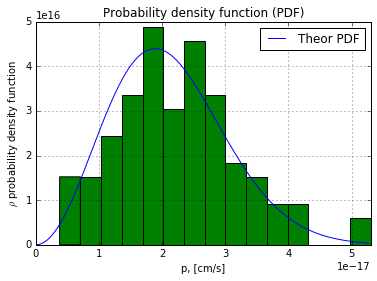

In [8]:
import os, glob
import h5py
import numpy as np
import matplotlib.pyplot as plt
import math
from mpl_toolkits.mplot3d import Axes3D

def main():
    filename = 'maxwell_check_0010000.h5'
    h5 = h5py.File(filename, mode="r")
    
    m = 1.67e-22
    T = 7.740e+03
    N = 100
    k_B = 1.38e-16
    distr, p_grid, p = analyt_maxwell_distrib(N, T, m, k_B, h5)                      #(*1)
    p_sim_av = np.mean(p)

    p_average = (8*m*k_B*T/math.pi) ** (1/2)                                         #(*2)
    p_mst_prob = (2*m*k_B*T) ** (1/2)                                                #(*3)
    print( "p_sim_av = {:.3e} [cm/s]".format( p_sim_av ) )                           #(*4)     
    print( "p_theor_average = {:.3e} [cm/s]".format( p_average ) )                   #(*5)    

    plt.figure()
    plt.xlabel('p, [cm/s]')
    plt.xlabel('p, [cm/s]')
    plt.ylabel(r'$\rho$ (probability density function) ')
    plt.title('Probability density function (PDF)')
    plt.ylabel(r'$\rho$ probability density function')
    plt.plot(p_grid,distr,label = 'Theor PDF')
    plt.hist(p,15, normed=True)
    plt.xlim(0.0, p.max())
    plt.legend()
    plt.grid(True)
    h5.close()
    
main()

If you track changes in the particle distribution as a function of momenta, you will see that over time the resulting distribution approaches to the theoretical distribution. Moreover the typical values of the ion gas have to tend to the theoretical values. It is suggested to compare the obtained values by the simulation with theoretical values (*4,*5)